In [1]:
#import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#import packages for modeling
from xgboost import XGBClassifier 
from xgboost import plot_importance 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

# import metrics and functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn.tree import plot_tree

In [2]:
#load the dataset
df0 = pd.read_csv('HR_dataset.csv')

In [3]:
#Display first 5 rows
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Cleaning and Exploration 

In [4]:
#Basic information about the data 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#Gather descriptive statistics about the data 
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
#Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
#Rename column 
df0 = df0.rename(columns = {'average_montly_hours':'average_monthly_hours',
                            'time_spend_company':'tenure',
                            'Work_accident': 'work_accident',
                            'Department': 'department'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
#checking for missing value 
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
#check for duplicates 
df0.duplicated().sum()

np.int64(3008)

In [10]:
#inspect rows containing duplicate
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')
# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Tenure Distribution')

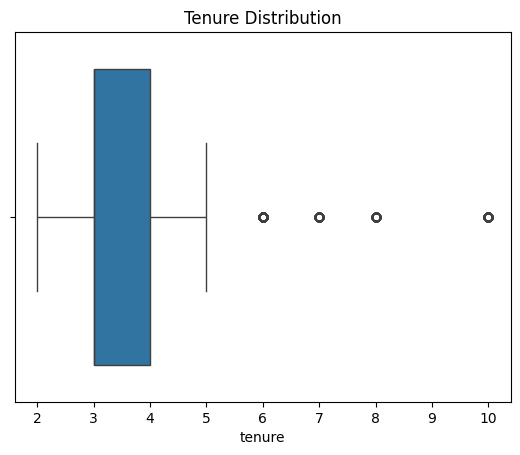

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df1['tenure'])
plt.title('Tenure Distribution')

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [13]:
# Determine the number of rows containing outliers

# Compute 25th and 75th percentile 
percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)
# Compute the interquartile range 
iqr = percentile_75 - percentile_25
# Compute upper and lower limit 
upper_limit = percentile_75 + 1.5 * iqr 
lower_limit = percentile_25 -  1.5 * iqr
print(f'Upper Limit: {upper_limit:.2f}')
print(f'Lower Limit: {lower_limit:.2f}')
# Identify subset of data containing outlier 
outliers = df1[(df1['tenure']> upper_limit) | (df1['tenure'] < lower_limit)]
print(f'Number of rows with outliers in tenure: {len(outliers)}')

Upper Limit: 5.50
Lower Limit: 1.50
Number of rows with outliers in tenure: 824


In [14]:
# Get numbers of people who left vs. stayed
print(f'Number of people who left vs stayed: {df1['left'].value_counts()}')

# Get percentages of people who left vs. stayed
print(f'Number of people who left vs stayed: {df1['left'].value_counts(normalize = True)}')

Number of people who left vs stayed: left
0    10000
1     1991
Name: count, dtype: int64
Number of people who left vs stayed: left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


# Data visualization

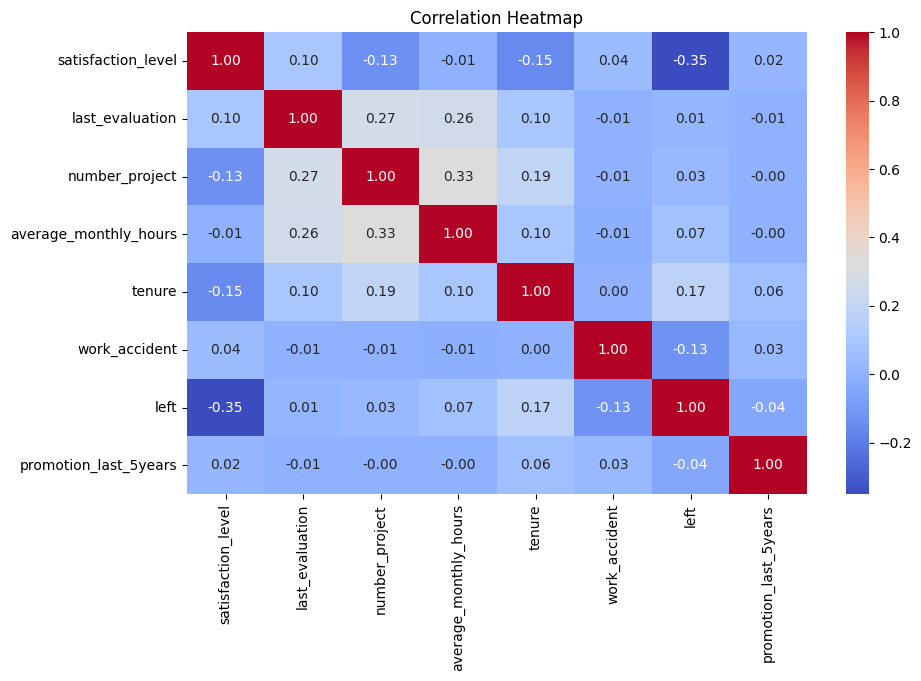

In [15]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', fmt ='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Satisfaction level has the strongest negative correlation with leaving (-0.35), indicating lower satisfaction is associated with higher turnover.
- Tenure has a small positive correlation with leaving (0.17), suggesting mid-tenure employees are more likely to leave.
- Other features (e.g., work_accident, promotion_last_5_years) have weak correlations, meaning they may not be strong predictors alone.

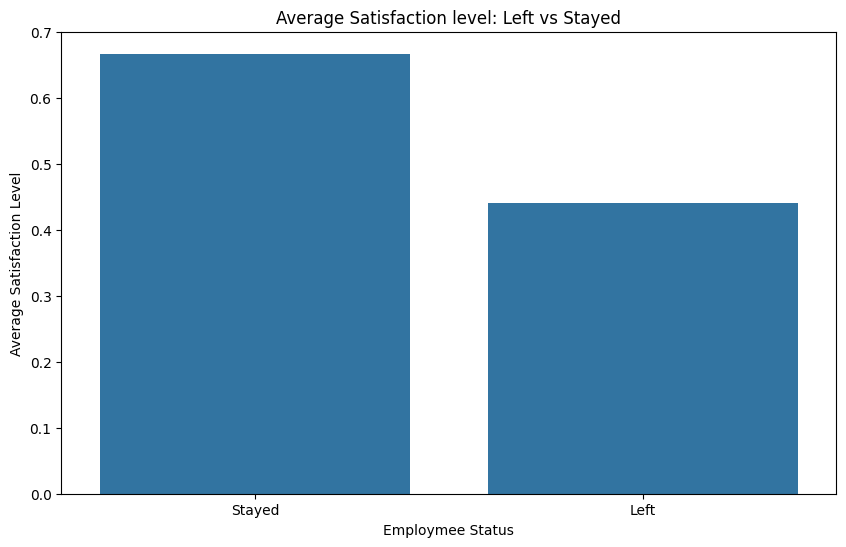

In [16]:
#Grouped data
satisfaction = df1.groupby('left')['satisfaction_level'].mean().reset_index()
#Rename for clarify 
satisfaction['left'] = satisfaction['left'].map({0: 'Stayed', 1: 'Left'})
plt.figure(figsize = (10,6))
plt.title('Average Satisfaction level: Left vs Stayed')
sns.barplot(x= 'left', y = 'satisfaction_level', data = satisfaction)
plt.xlabel('Employmee Status')
plt.ylabel('Average Satisfaction Level')
plt.show()

- Employees who left had a significantly lower average satisfaction level (~0.44) than those who stayed (~0.66).
- Confirms the negative correlation and highlights dissatisfaction as a likely driver of turnover.

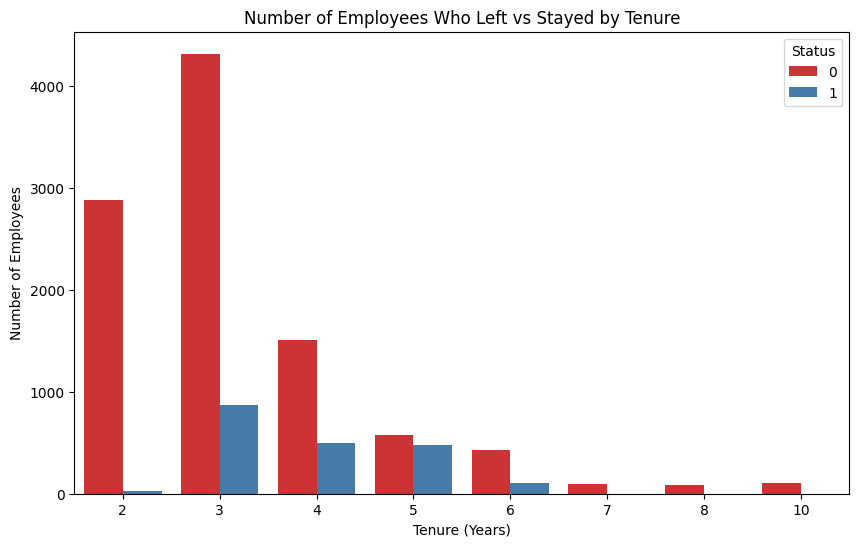

In [17]:
# Group and rename columns
tenure = df1.groupby('tenure')['left'].value_counts().reset_index()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure', y='count', hue='left', data=tenure, palette='Set1')
plt.title('Number of Employees Who Left vs Stayed by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.legend(title='Status')
plt.show()

- Employees with 2–4 years of tenure are much more likely to leave.
- Those with longer tenure (6+ years) rarely leave, suggesting retention improves with time.
- High turnover in early years may indicate onboarding, role fit, or job satisfaction issues.


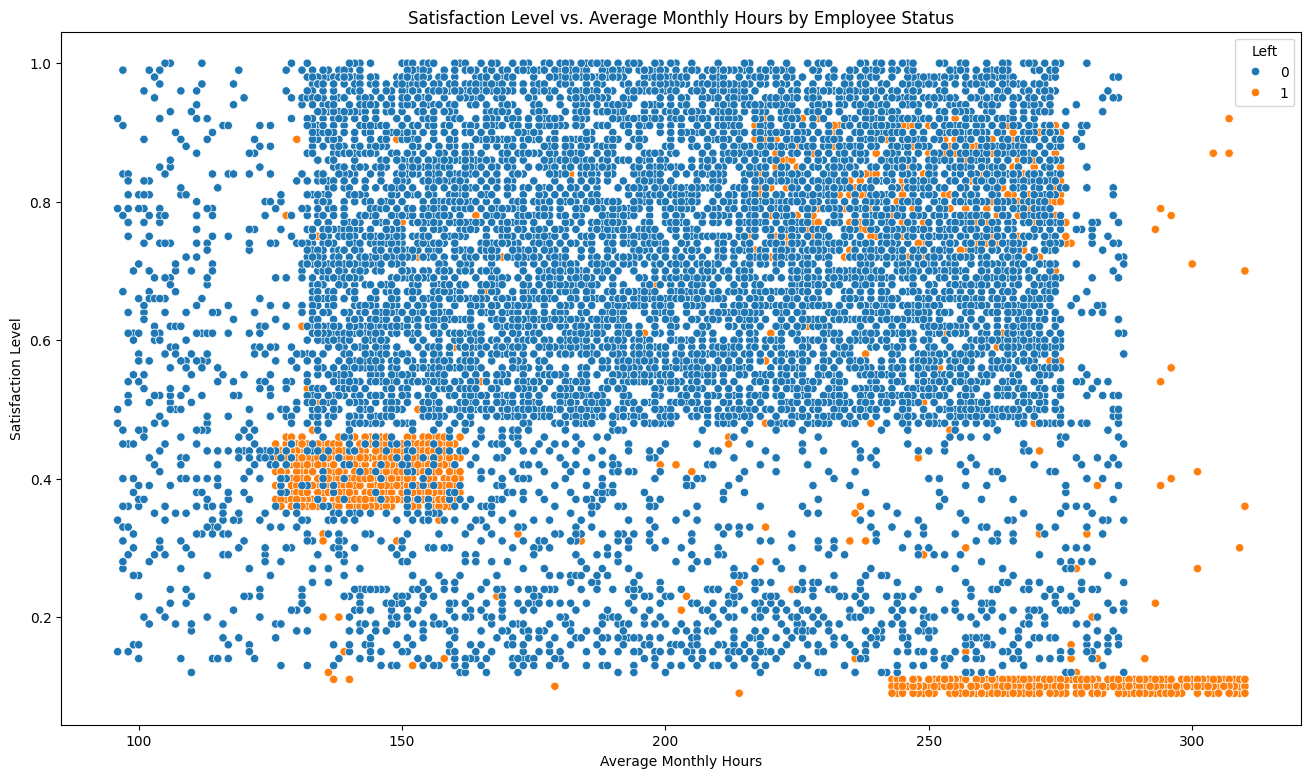

In [18]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16,9))
sns.scatterplot(x='average_monthly_hours', y = 'satisfaction_level',hue = 'left',data = df1)
plt.title('Satisfaction Level vs. Average Monthly Hours by Employee Status')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left')
plt.show()

- Clusters show that people with low satisfaction and either very low or very high hours are more likely to leave.
- Suggests a U-shaped risk zone for overwork and underutilization — both correlate with dissatisfaction and attrition.

<Axes: title={'center': 'Salary histogram by tenure'}, xlabel='tenure', ylabel='Count'>

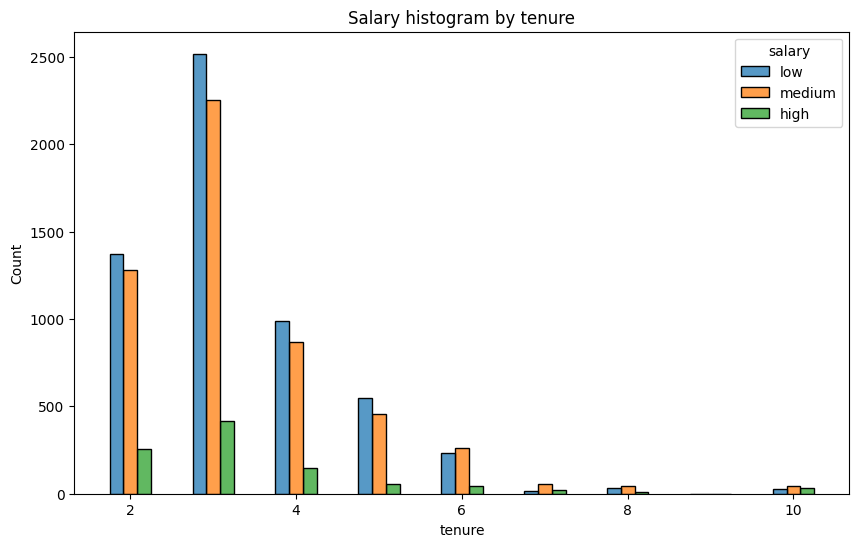

In [19]:
plt.figure(figsize = (10,6))
plt.title('Salary histogram by tenure')
sns.histplot(data = df1, x = 'tenure', hue = 'salary', discrete =1, 
             hue_order=['low', 'medium', 'high'],multiple = 'dodge',shrink =.5)

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 


Text(0.5, 1.0, 'Counts of stayed/left by department')

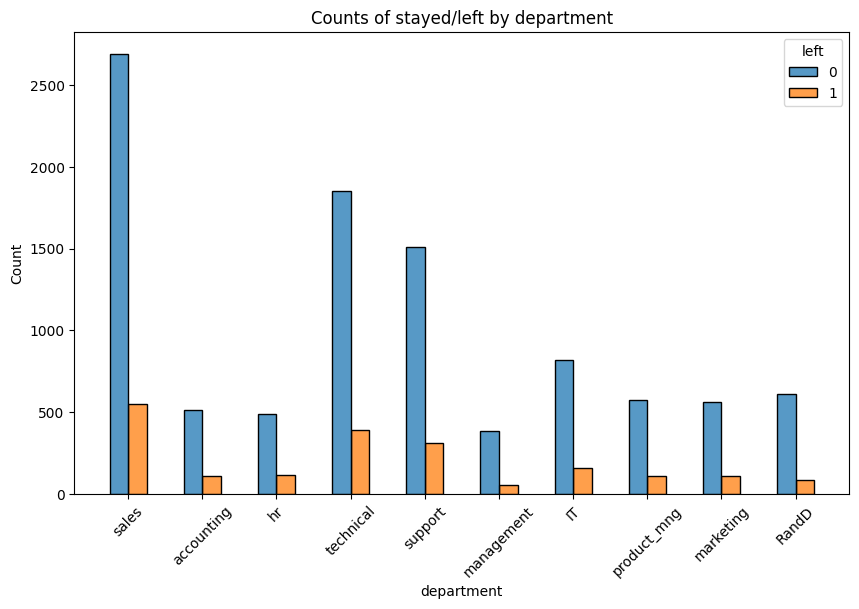

In [20]:
plt.figure(figsize = (10,6))
plt.title('Salary histogram by tenure')
sns.histplot(data = df1, x = 'department', hue = 'left', discrete =1, 
            multiple = 'dodge',shrink =.5)
plt.xticks(rotation = 45)
plt.title('Counts of stayed/left by department')

- Sales, technical, and support departments see higher attrition.
- Departments like management and IT have higher retention.
- Indicates some departments might need targeted interventions, such as improving leadership, workload, or growth opportunities.

## Insights

Employee satisfaction is the strongest factor linked to attrition. Employees with moderate tenure (2–4 years), extreme workloads, or in sales/technical roles are especially prone to leaving. Low satisfaction, low salary, and department-specific dynamics drive most turnover, suggesting that targeted retention strategies especially around early-career engagement, compensation, and workload balance could reduce employee churn.



# Modeling

## Logistic Regression

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.


In [21]:
#Copy the DataFrame 
df_enc = df1.copy()

#Dummy encode the 'department column'
df_enc = pd.get_dummies(df_enc, columns = ['department'], drop_first = False, dtype=int)
# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [22]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logistic = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

In [23]:
# Select the features for the model
X = df_logistic.drop(columns ='left', axis = 1)
y = df_logistic['left']

In [24]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) #stratify based on the values in y since the classes are unbalanced

In [25]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state =42, max_iter = 500).fit(X_train, y_train)

In [26]:
#Predictions on the test set
y_pred = log_clf.predict(X_test)

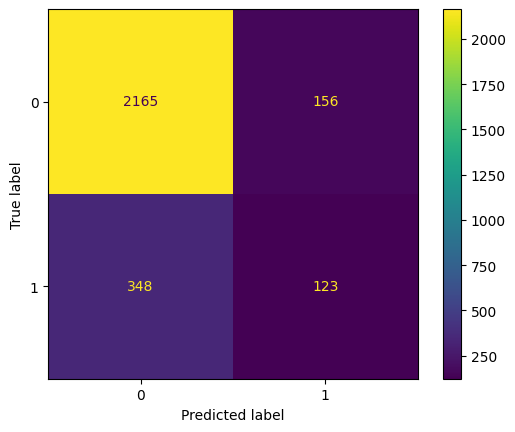

In [27]:
cm = confusion_matrix(y_test, y_pred, labels= log_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_clf.classes_)
disp.plot()

- The upper-left quadrant displays the number of true negatives.
- The bottom-right quadrant displays the number of true positives.
- The bottom-left quadrant displays the number of false negatives.
- The upper-right quadrant displays the number of false positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

True positives: The number of people who left the model accurately predicted as leaving

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave


A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

## Tree-based model 

In [29]:
# Select the features
X= df_enc.drop(columns = ['left'], axis =1)
y=df_enc['left']

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [31]:
tree = DecisionTreeClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [None, 4,6,8],
             'min_samples_split':[2,4,6],
             'min_samples_leaf': [2,5,10]}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}
# Instantiate GridSearch
tree_clf = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [32]:
tree_clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 4, 6, 8],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [33]:
tree_clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [34]:
# Check best AUC score on CV
tree_clf.best_score_

np.float64(0.969819392792457)

This is a strong AUC score, which shows that this model can predict employees who will leave very well.


In [35]:
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [36]:
tree_result = make_results('Decision Tree', tree_clf, 'auc')
tree_result

,model,precision,recall,F1,accuracy,auc
0,Decision Tree,0.914552,0.916949,0.915707,0.971978,0.969819


In [37]:
tree_importances = pd.DataFrame(tree_clf.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_importances = tree_importances[tree_importances['gini_importance'] != 0]
tree_importances

,gini_importance
satisfaction_level,0.524622
last_evaluation,0.178501
tenure,0.120792
number_project,0.117102
average_monthly_hours,0.058983


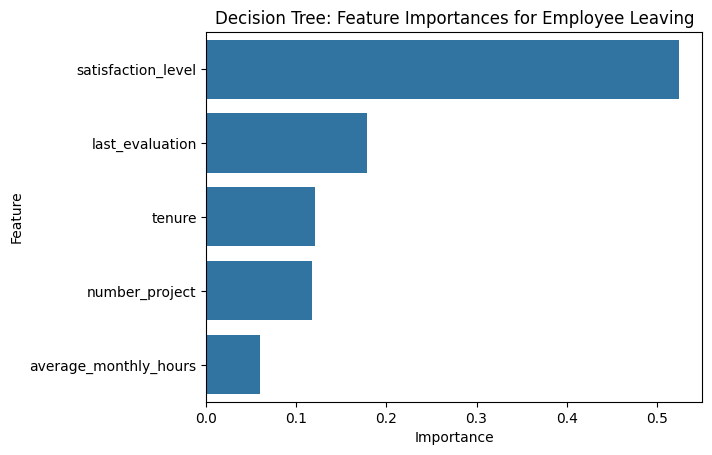

In [38]:
sns.barplot(data=tree_importances, x="gini_importance", y=tree_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

## Random Froest

In [39]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train)

In [ ]:
# Check best AUC score on CV
rf1.best_score_

In [ ]:
# Check best params
rf1.best_params_

In [ ]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree_result)
print(rf1_cv_results)

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [ ]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

In [ ]:
rf_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['importance'], 
                                 index=X.columns
                                )
rf_importances = rf_importances.sort_values(by='importance', ascending=False)

# Only extract the features with importances > 0
rf_importances = rf_importances[rf_importances['importance'] != 0]
rf_importances